<a href="https://colab.research.google.com/github/NirmalMendis/FirmFinancialPerformaneML/blob/main/FinancialPerformancePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Firm Financial Performance Prediction Using Machine Learning**

# **Importing Necessary Libraries**

In [ ]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"
from sklearn import linear_model
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder

# Common imports
import pandas as pd
import numpy as np
import os
import pickle

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

#imports for neural network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam

#Decision Tree
from sklearn.tree import DecisionTreeRegressor

#Random Forest
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Define Functions to be Used**

**Function 1**

Function to Evaluate Models using:

1.   Mean Absolute Error
2.   Mean Squared Error
3.   Root Mean Squared Error
4.   R Squared












In [ ]:
#function to evaluate models
def print_evaluate(true, predicted, train=True):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    if train:
        print("========Training Result=======")
        print('MAE: ', mae)
        print('MSE: ', mse)
        print('RMSE: ', rmse)
        print('R2 Square: ', r2_square)
    elif not train:
        print("=========Testing Result=======")
        print('MAE: ', mae)
        print('MSE: ', mse)
        print('RMSE: ', rmse)
        print('R2 Square: ', r2_square)

**Function 2**

Function to print list of predicted logAsset value along with the real logAsset value 

In [ ]:
#Print predicted logAsset and real logAsset
def print_Predictions(y_predict):
  for x in range(10):
    print("Predicted logAsset","      ","Real logAsset")
    print(np.array(y_predict)[x],"    ",  np.array(y_test)[x])

**Function 3**

Function to print graphical representation of actual value and the predicated value 

In [ ]:
#Graphical representation of the actual value and the predicated value

def graphical_Representation(y_test_prediction):
  width = 6
  height = 5
  plt.figure(figsize=(width, height))

  sns.distplot(y_test, hist=False, color="r", label="Actual Value")
  sns.distplot(y_test_prediction, hist=False, color='b', label="Fitted Values")

  #Actual color - red
  #predicted color - blue

  plt.title('Actual Vs Fitted Values For logAsset')
  plt.xlabel('logAsset')
  plt.ylabel('Probability Density')
  plt.legend() 
  plt.show()
  plt.close()

  plt.title('Actual Vs Fitted Values For logAsset')
  plt.scatter(y_test, y_test_prediction)
  plt.xlabel('Actual logAsset')
  plt.ylabel('Predicted logAsset')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Data Preprocessing and Visualization**

In [ ]:
#load dataset from drive
data = pd.read_excel(r'/content/drive/My Drive/FinancialPerformance/dataset.xlsx')
data.head(5)

,Ticker_Id,Indx_Members,Country,Year,Board size,Board independence,CEO duality,Board meeting attendance,Independence of audit committee,Auditor ratification,...,Staggered board,Diversity of board,Board duration,Corporate governance score,LogAsset,CAPEXByAsset,CashByAsset,DebtByAsset,PPNEByAsset,RNDByAsset
0,600000 CH,600000 CH Equity,China,2010,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,1.0,0.0,5.0,14.600056,-0.000720,0.133817,0.176164,0.003517,NaN
1,600008 CH,600008 CH Equity,China,2010,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,1.0,1.0,6.0,9.731575,-0.054758,0.120913,0.308104,0.284966,0.000000
2,600009 CH,600009 CH Equity,China,2010,1.0,0.0,1.0,1.0,1.0,0.0,...,1.0,1.0,1.0,7.0,9.770057,-0.029786,0.080509,0.141943,0.765993,0.000000
3,600010 CH,600010 CH Equity,China,2010,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,1.0,0.0,5.0,10.654971,-0.047916,0.049623,0.394964,0.489334,0.000116
4,600015 CH,600015 CH Equity,China,2010,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,1.0,0.0,5.0,13.854953,-0.002453,0.135931,0.210002,0.005672,NaN


In [ ]:
data.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5008 entries, 0 to 5007
Data columns (total 24 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Ticker_Id                                          5008 non-null   object 
 1   Indx_Members                                       5008 non-null   object 
 2   Country                                            5008 non-null   object 
 3   Year                                               5008 non-null   int64  
 4   Board size                                         4864 non-null   float64
 5   Board independence                                 4864 non-null   float64
 6   CEO duality                                        4864 non-null   float64
 7   Board meeting attendance                           4864 non-null   float64
 8   Independence of audit committee                    4864 non-null   float64
 9   Auditor 

In [ ]:
#remove unnecessary columns
data = data.drop(columns=['Ticker_Id', 'Indx_Members', 'Year', 'CAPEXByAsset', 'CashByAsset', 'DebtByAsset', 'PPNEByAsset', 'RNDByAsset'])

Clean dataset to remove rows with null values

In [ ]:
#Get column list with null values
data.columns[data.isnull().any()]

Index(['Board size', 'Board independence', 'CEO duality',
       'Board meeting attendance', 'Independence of audit committee',
       'Auditor ratification', 'Independence of compensation committee',
       'Independence of nomination committee',
       'Shareholder approved poison pill',
       'Dual class unequal voting rights of common shares', 'Staggered board',
       'Diversity of board', 'Board duration', 'Corporate governance score',
       'LogAsset'],
      dtype='object')

In [ ]:
#Drop rows null values
data = data.dropna();
data.info();

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4683 entries, 0 to 5007
Data columns (total 16 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Country                                            4683 non-null   object 
 1   Board size                                         4683 non-null   float64
 2   Board independence                                 4683 non-null   float64
 3   CEO duality                                        4683 non-null   float64
 4   Board meeting attendance                           4683 non-null   float64
 5   Independence of audit committee                    4683 non-null   float64
 6   Auditor ratification                               4683 non-null   float64
 7   Independence of compensation committee             4683 non-null   float64
 8   Independence of nomination committee               4683 non-null   float64
 9   Sharehol

**Exploratory Data Analysis (EDA)**

In [ ]:
#get columns with numerical values
numerical_cols = data.columns[data.dtypes==float].tolist() + data.columns[data.dtypes==int].tolist()
numerical_cols

['Board size',
 'Board independence',
 'CEO duality',
 'Board meeting attendance',
 'Independence of audit committee',
 'Auditor ratification',
 'Independence of compensation committee',
 'Independence of nomination committee',
 'Shareholder approved poison pill',
 'Dual class unequal voting rights of common shares',
 'Staggered board',
 'Diversity of board',
 'Board duration',
 'Corporate governance score',
 'LogAsset']

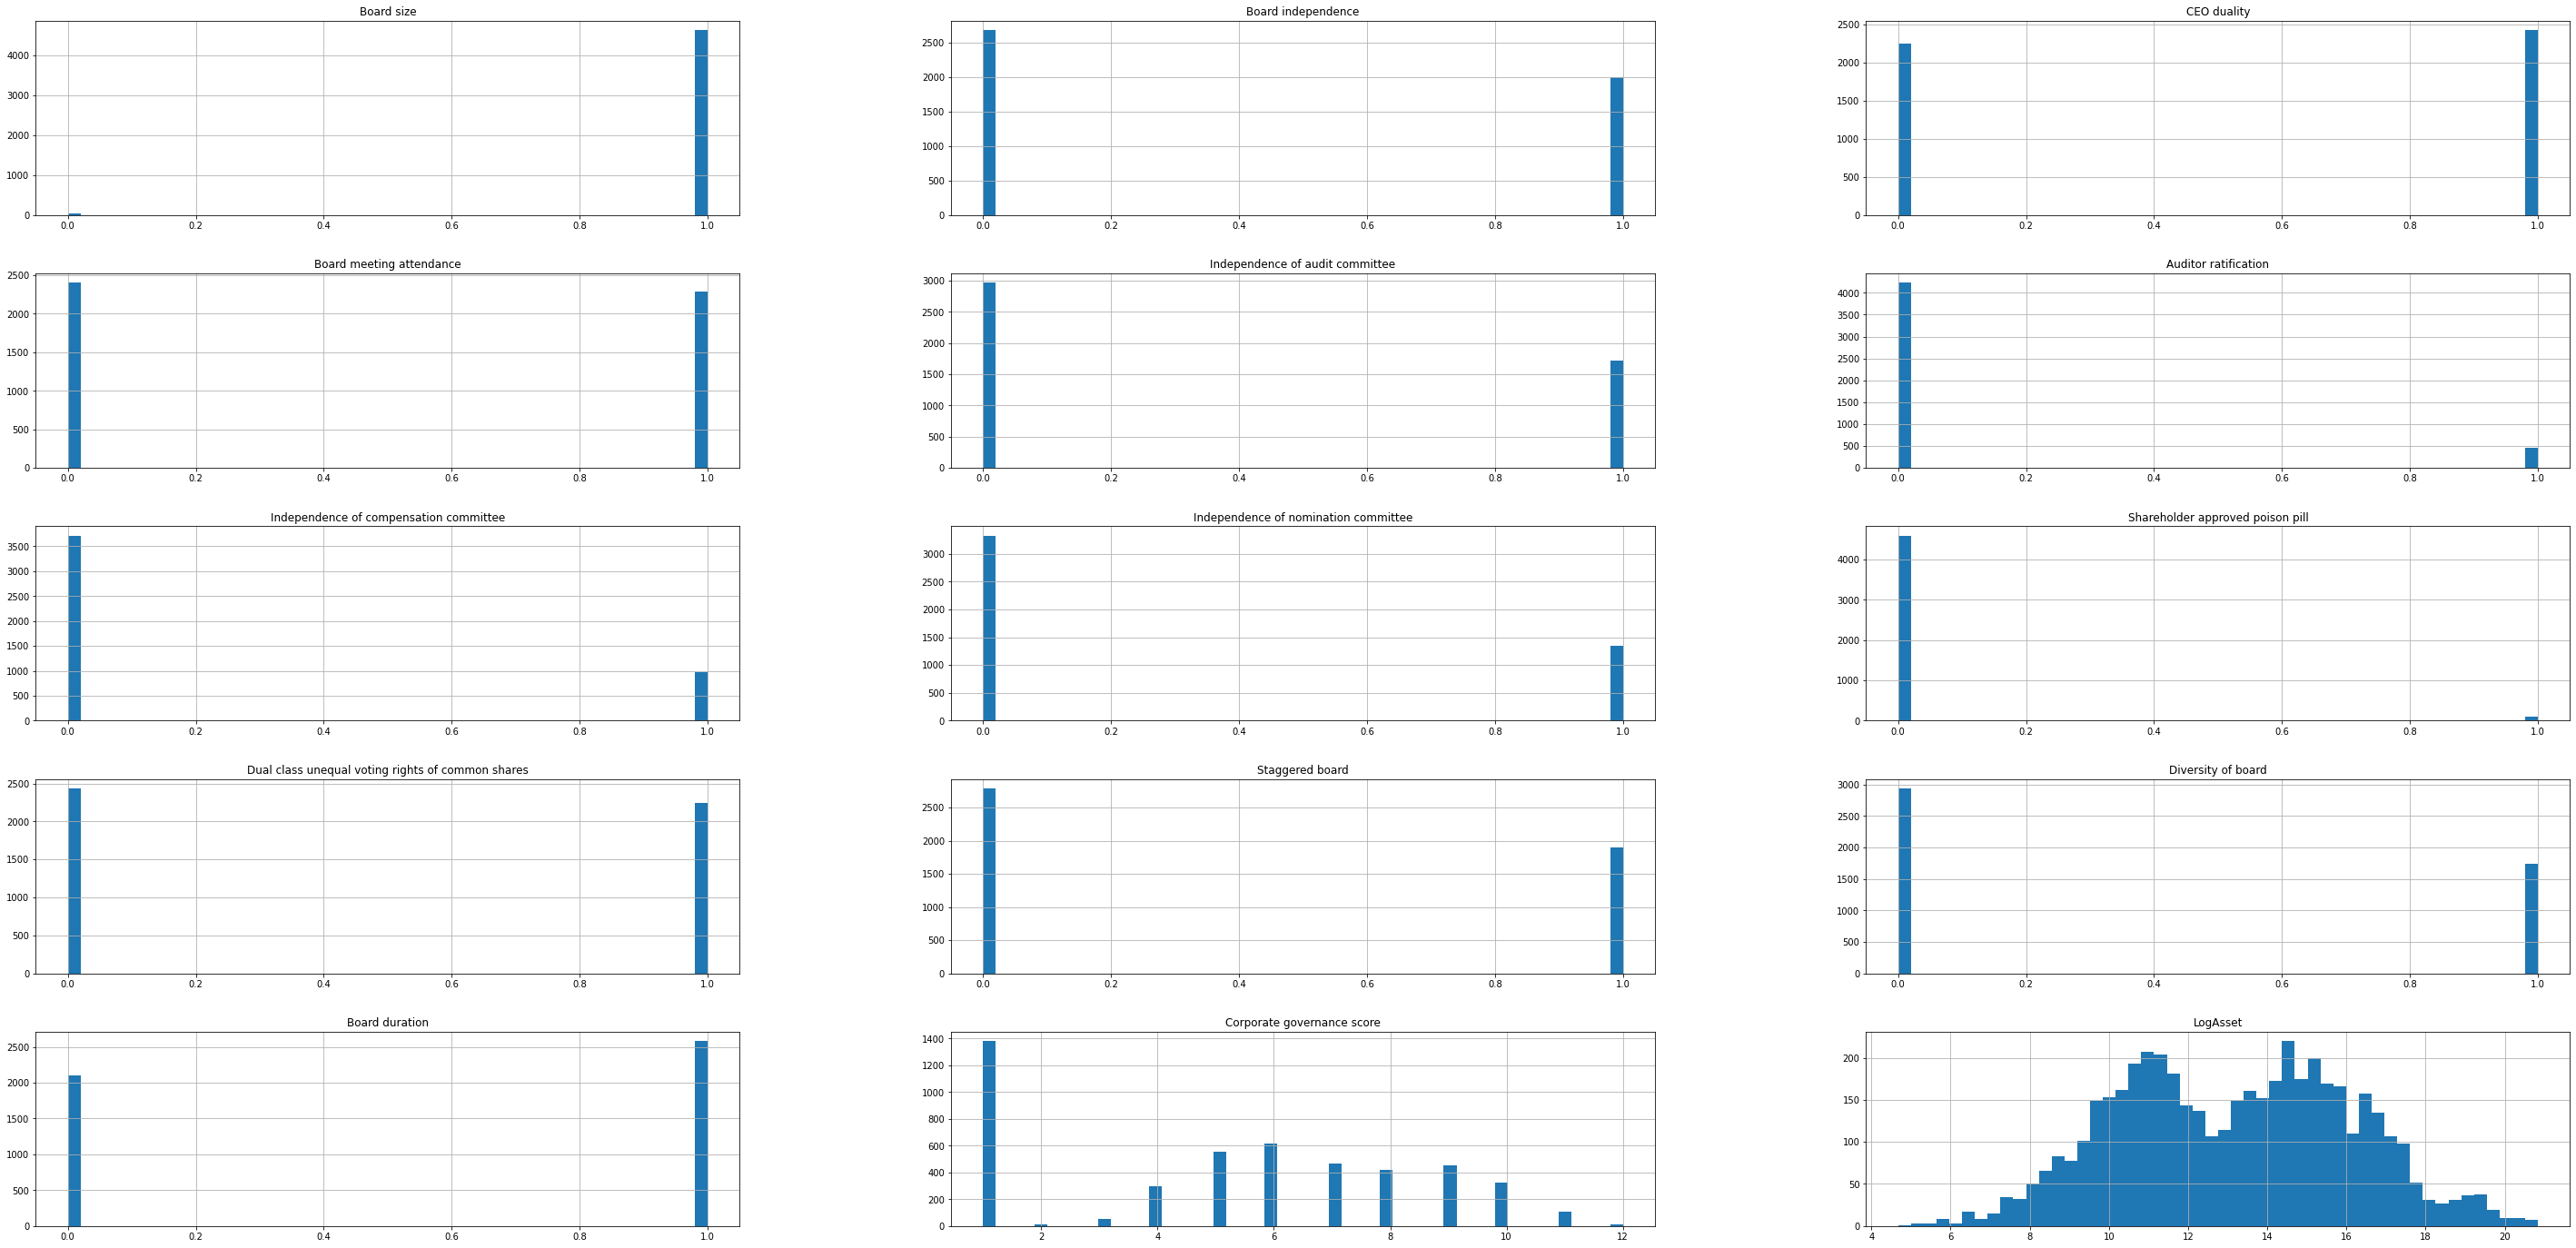

In [ ]:
#plot histograms to numerical features
data[numerical_cols].hist(bins=50,figsize=(50,50), layout=(10,3), rwidth=5)
plt.show()

**One Hot Encoding of Categorical Data**

In [ ]:
#Get a list of columns with categorical data
nominal_cols = data.columns[data.dtypes==object].tolist()
nominal_cols

['Country']

In [ ]:
#encoding the categorical features

hot_encoder = OneHotEncoder()

encoded_data = hot_encoder.fit_transform(data[nominal_cols]).toarray()
encoded_data

array([[1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.]])

In [ ]:
#Generating labels for columns
hot_encoder_Labels = hot_encoder.get_feature_names(nominal_cols)
hot_encoder_Labels

array(['Country_China', 'Country_India', 'Country_Indonesia',
       'Country_Japan', 'Country_South Korea', 'Country_Thailand'],
      dtype=object)

In [ ]:
#converting the encoded array into a dataframe
features = pd.DataFrame(encoded_data, columns=hot_encoder_Labels)
features.head(5)

,Country_China,Country_India,Country_Indonesia,Country_Japan,Country_South Korea,Country_Thailand
0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#Drop the unencoded categorigal features
data = data.drop(columns=nominal_cols)

In [ ]:
#merge the original dataset with the encoded feature dataset
data = pd.concat([data.reset_index(drop=True),features.reset_index(drop=True)], axis=1)
data.head(5)

,Board size,Board independence,CEO duality,Board meeting attendance,Independence of audit committee,Auditor ratification,Independence of compensation committee,Independence of nomination committee,Shareholder approved poison pill,Dual class unequal voting rights of common shares,...,Diversity of board,Board duration,Corporate governance score,LogAsset,Country_China,Country_India,Country_Indonesia,Country_Japan,Country_South Korea,Country_Thailand
0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,14.600056,1.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,6.0,9.731575,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,7.0,9.770057,1.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,10.654971,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,13.854953,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4683 entries, 0 to 4682
Data columns (total 21 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Board size                                         4683 non-null   float64
 1   Board independence                                 4683 non-null   float64
 2   CEO duality                                        4683 non-null   float64
 3   Board meeting attendance                           4683 non-null   float64
 4   Independence of audit committee                    4683 non-null   float64
 5   Auditor ratification                               4683 non-null   float64
 6   Independence of compensation committee             4683 non-null   float64
 7   Independence of nomination committee               4683 non-null   float64
 8   Shareholder approved poison pill                   4683 non-null   float64
 9   Dual cla

# **Feature Selection**

Obtain Spearman correlation coefficient
Reasons: All variables are either binary or rank variables

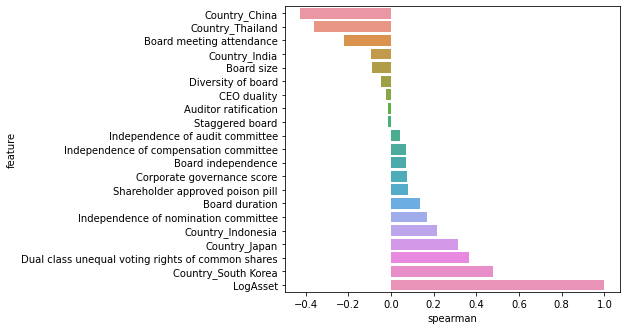

In [ ]:
def spearman(frame, features):
    spr = pd.DataFrame()
    spr['feature'] = features
    spr['spearman'] = [frame[f].corr(frame['LogAsset'], 'spearman') for f in features]
    spr = spr.sort_values('spearman')
    plt.figure(figsize=(6, 0.25*len(features)))
    sns.barplot(data=spr, y='feature', x='spearman', orient='h')
    
features = data.columns
spearman(data, features)

By considering Spearman correlation coefficient, the features with very low correlation is removed from the dataset.

In [ ]:
data = data.drop(columns=['Staggered board'])

In [ ]:
predict = "LogAsset" #target

X = (data.drop([predict], 1)) # Features
y = (data[predict]) # Labels

Create train and test datasets

In [ ]:
#split data to train and test
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.3, random_state = 1)

# **Model Building**

**Linear Regression Model**

In [ ]:
#linear regression model
model_Linear = linear_model.LinearRegression()
model_Linear.fit(X_train, y_train)
acc = model_Linear.score(X_test, y_test) # acc stands for accuracy 
print("accuracy = ",acc)

accuracy =  0.610207704525151


In [ ]:
# Gets a list of all predictions
y_train_predLin = model_Linear.predict(X_train) #prediction for training data
y_test_predLin = model_Linear.predict(X_test) #prediction for testing data

#Print predicted logAsset and real logAsset for 10 rows
print_Predictions(y_test_predLin)

Predicted logAsset        Real logAsset
13.832404842459809      13.04255104319279
Predicted logAsset        Real logAsset
14.61452854192792      14.117793516791552
Predicted logAsset        Real logAsset
17.190759883861077      14.848039286627396
Predicted logAsset        Real logAsset
16.145709759539997      16.487902976464504
Predicted logAsset        Real logAsset
14.61452854192792      14.292754165204686
Predicted logAsset        Real logAsset
14.61452854192792      14.801468760398917
Predicted logAsset        Real logAsset
12.885130007018258      11.575402487679312
Predicted logAsset        Real logAsset
10.157806084949822      13.61935875347291
Predicted logAsset        Real logAsset
10.591193217210693      7.376935266227906
Predicted logAsset        Real logAsset
12.241413060314922      12.695348737049642


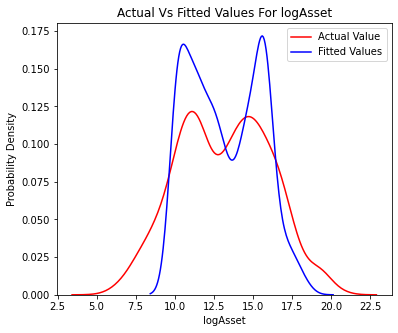

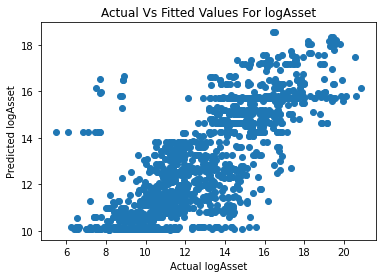

In [ ]:
#Graphical representation of the actual value and the predicated value
graphical_Representation(y_test_predLin)

In [ ]:
#evaluate linear model
print_evaluate(y_train, y_train_predLin, train=True)
print_evaluate(y_test, y_test_predLin, train=False)

========Training Result=======
MAE:  1.3562265561064015
MSE:  3.398507301677825
RMSE:  1.8435040823599564
R2 Square:  0.6114886779880176
=========Testing Result=======
MAE:  1.3567758834899635
MSE:  3.350781609647157
RMSE:  1.8305140288037012
R2 Square:  0.610207704525151


 **Neural Network**

In [ ]:
model_NeuralNet = Sequential()
#input layer
model_NeuralNet.add(Dense(X_train.shape[1],activation='relu'))

# hidden layers
model_NeuralNet.add(Dense(256,activation='relu'))
model_NeuralNet.add(Dropout(0.2))
model_NeuralNet.add(Dense(256,activation='relu'))
model_NeuralNet.add(Dropout(0.2))
model_NeuralNet.add(Dense(128,activation='relu'))
model_NeuralNet.add(Dropout(0.2))


#output layer
model_NeuralNet.add(Dense(1))

model_NeuralNet.compile(optimizer='adam', loss='mse')

In [ ]:
from keras import callbacks 
#use early stopping to prevent overfitting
earlystopping = callbacks.EarlyStopping(monitor ="val_loss",  
                                        mode ="min", patience = 50,  
                                        restore_best_weights = True) 
  
r = model_NeuralNet.fit(X_train, y_train.values,
              validation_split=0.2,
              batch_size=128,
              epochs=5000,  
                    callbacks =[earlystopping]) 

Epoch 1/5000
21/21 [==============================] - 2s 19ms/step - loss: 91.1967 - val_loss: 35.9333
Epoch 2/5000
21/21 [==============================] - 0s 9ms/step - loss: 30.5160 - val_loss: 11.2514
Epoch 3/5000
21/21 [==============================] - 0s 10ms/step - loss: 9.9522 - val_loss: 5.1168
Epoch 4/5000
21/21 [==============================] - 0s 9ms/step - loss: 7.0620 - val_loss: 5.1075
Epoch 5/5000
21/21 [==============================] - 0s 10ms/step - loss: 6.5573 - val_loss: 4.3941
Epoch 6/5000
21/21 [==============================] - 0s 9ms/step - loss: 6.3464 - val_loss: 4.0195
Epoch 7/5000
21/21 [==============================] - 0s 9ms/step - loss: 5.7879 - val_loss: 3.9611
Epoch 8/5000
21/21 [==============================] - 0s 9ms/step - loss: 5.6426 - val_loss: 3.8503
Epoch 9/5000
21/21 [==============================] - 0s 10ms/step - loss: 5.4112 - val_loss: 3.7135
Epoch 10/5000
21/21 [==============================] - 0s 10ms/step - loss: 5.2461 - val_los

In [ ]:
#Get a list of predictions
y_train_predNN = model_NeuralNet.predict(X_train) #prediction for training data
y_test_predNN = model_NeuralNet.predict(X_test) #prediction for testing data

#Print predicted logAsset and real logAsset for 10 rows
print_Predictions(y_test_predNN)

Predicted logAsset        Real logAsset
[12.640575]      13.04255104319279
Predicted logAsset        Real logAsset
[14.620991]      14.117793516791552
Predicted logAsset        Real logAsset
[16.11607]      14.848039286627396
Predicted logAsset        Real logAsset
[14.86495]      16.487902976464504
Predicted logAsset        Real logAsset
[14.620991]      14.292754165204686
Predicted logAsset        Real logAsset
[14.620991]      14.801468760398917
Predicted logAsset        Real logAsset
[12.525452]      11.575402487679312
Predicted logAsset        Real logAsset
[10.333891]      13.61935875347291
Predicted logAsset        Real logAsset
[10.258997]      7.376935266227906
Predicted logAsset        Real logAsset
[12.195251]      12.695348737049642


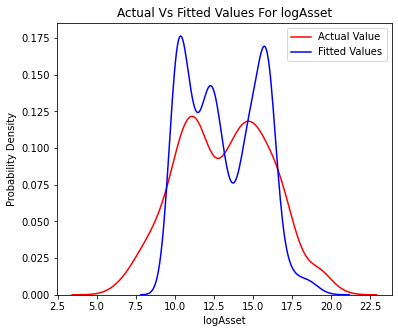

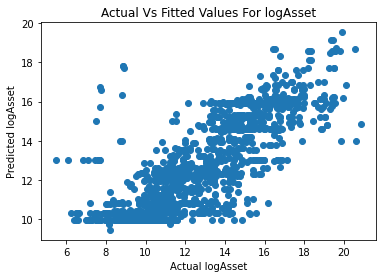

In [ ]:
#Graphical representation of the actual value and the predicated value
graphical_Representation(y_test_predNN)

In [ ]:
#evaluate the model
print_evaluate(y_train, y_train_predNN, train=True)
print_evaluate(y_test, y_test_predNN, train=False)

========Training Result=======
MAE:  1.217269397734206
MSE:  2.8213687355461503
RMSE:  1.6796930480138776
R2 Square:  0.6774661343851889
=========Testing Result=======
MAE:  1.2541086511719484
MSE:  3.017710369986139
RMSE:  1.7371558277788839
R2 Square:  0.6489534713905103


**Decision Tree**

In [ ]:
#decision tree
modelDecisionTree = DecisionTreeRegressor()
modelDecisionTree.fit(X_train,y_train)

DecisionTreeRegressor()

In [ ]:
y_train_predDT = modelDecisionTree.predict(X_train)
y_test_predDT = modelDecisionTree.predict(X_test)

#Print predicted logAsset and real logAsset for 10 rows
print_Predictions(y_test_predDT)

Predicted logAsset        Real logAsset
12.737979760467939      13.04255104319279
Predicted logAsset        Real logAsset
14.765810322440618      14.117793516791552
Predicted logAsset        Real logAsset
16.707885369664577      14.848039286627396
Predicted logAsset        Real logAsset
17.459478223644435      16.487902976464504
Predicted logAsset        Real logAsset
14.765810322440618      14.292754165204686
Predicted logAsset        Real logAsset
14.765810322440618      14.801468760398917
Predicted logAsset        Real logAsset
13.521506790164434      11.575402487679312
Predicted logAsset        Real logAsset
10.275628453934479      13.61935875347291
Predicted logAsset        Real logAsset
10.28483315082688      7.376935266227906
Predicted logAsset        Real logAsset
11.733471477491014      12.695348737049642


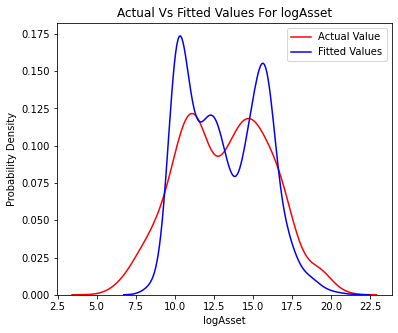

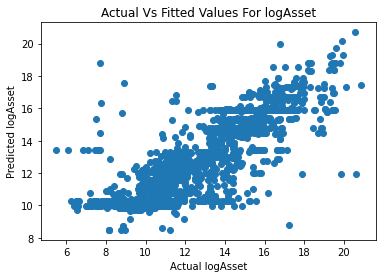

In [ ]:
#Graphical representation of the actual value and the predicated value
graphical_Representation(y_test_predDT)

In [ ]:
#evaluate the model
print_evaluate(y_train, y_train_predDT, train=True)
print_evaluate(y_test, y_test_predDT, train=False)

========Training Result=======
MAE:  1.0318743020690053
MSE:  2.319068829396308
RMSE:  1.5228489187691299
R2 Square:  0.7348881680199042
=========Testing Result=======
MAE:  1.2015953035854197
MSE:  2.962347702521784
RMSE:  1.7211472053609431
R2 Square:  0.6553937422731042


**Random Forest Regression**

In [ ]:
#random forest
modelRandomForest = RandomForestRegressor(random_state=1)

In [ ]:
modelRandomForest.fit(X_train,y_train)

RandomForestRegressor(random_state=1)

In [ ]:
y_train_predRF = modelRandomForest.predict(X_train)
y_test_predRF = modelRandomForest.predict(X_test)

#Print predicted logAsset and real logAsset for 10 rows
print_Predictions(y_test_predRF)

Predicted logAsset        Real logAsset
12.751310918059607      13.04255104319279
Predicted logAsset        Real logAsset
14.769191785109554      14.117793516791552
Predicted logAsset        Real logAsset
16.697452747958653      14.848039286627396
Predicted logAsset        Real logAsset
17.487473681677926      16.487902976464504
Predicted logAsset        Real logAsset
14.769191785109554      14.292754165204686
Predicted logAsset        Real logAsset
14.769191785109554      14.801468760398917
Predicted logAsset        Real logAsset
13.457603766000215      11.575402487679312
Predicted logAsset        Real logAsset
10.285033818077057      13.61935875347291
Predicted logAsset        Real logAsset
10.27666319557653      7.376935266227906
Predicted logAsset        Real logAsset
11.625873539945736      12.695348737049642


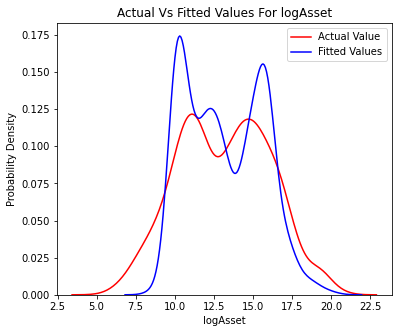

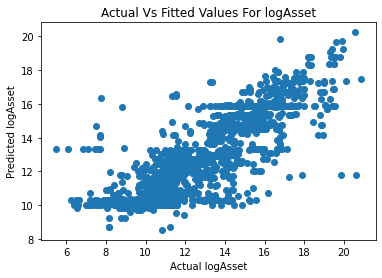

In [ ]:
#Graphical representation of the actual value and the predicated value
graphical_Representation(y_test_predRF)

In [ ]:
#evaluate the model
print_evaluate(y_train, y_train_predRF, train=True)
print_evaluate(y_test, y_test_predRF, train=False)

========Training Result=======
MAE:  1.0662888154187373
MSE:  2.349429186861512
RMSE:  1.5327847816511984
R2 Square:  0.7314174258473807
=========Testing Result=======
MAE:  1.2024519791958441
MSE:  2.822525902710829
RMSE:  1.6800374706270182
R2 Square:  0.671659039942407


# **Model Comparison**

In [ ]:
print("----------Linear Regression----------\n")
print_evaluate(y_test, y_test_predLin, train=False)
print("\n----------Neural Network----------\n")
print_evaluate(y_test, y_test_predNN, train=False)
print("\n----------Decision Tree----------\n")
print_evaluate(y_test, y_test_predDT, train=False)
print("\n----------Random Forest----------\n")
print_evaluate(y_test, y_test_predRF, train=False)


----------Linear Regression----------

=========Testing Result=======
MAE:  1.3567758834899635
MSE:  3.350781609647157
RMSE:  1.8305140288037012
R2 Square:  0.610207704525151

----------Neural Network----------

=========Testing Result=======
MAE:  1.2541086511719484
MSE:  3.017710369986139
RMSE:  1.7371558277788839
R2 Square:  0.6489534713905103

----------Decision Tree----------

=========Testing Result=======
MAE:  1.2015953035854197
MSE:  2.962347702521784
RMSE:  1.7211472053609431
R2 Square:  0.6553937422731042

----------Random Forest----------

=========Testing Result=======
MAE:  1.2024519791958441
MSE:  2.822525902710829
RMSE:  1.6800374706270182
R2 Square:  0.671659039942407


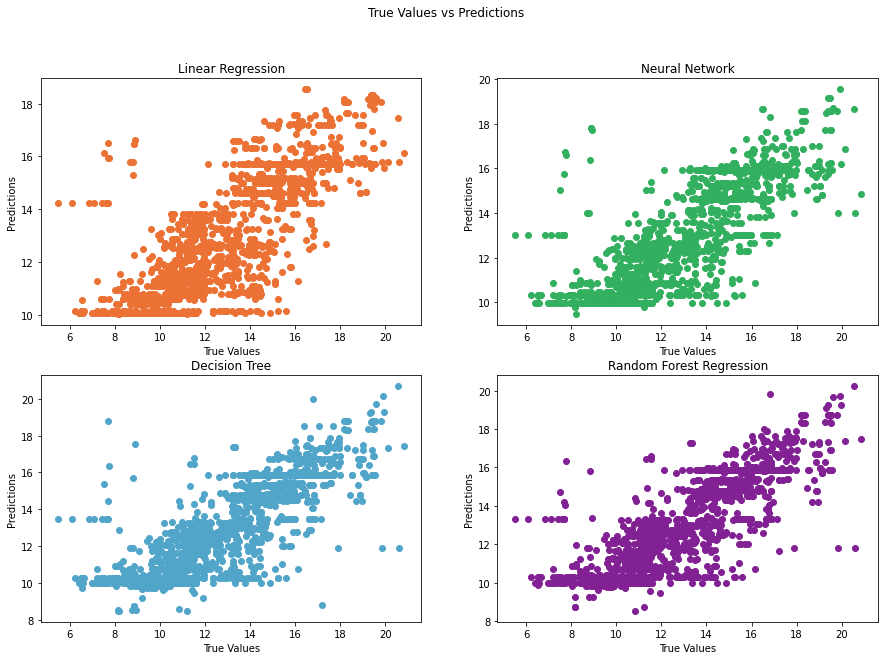

In [ ]:
fig, ((fig1, fig2),(fig3, fig4)) = plt.subplots(2,2, figsize=(15, 10))
fig.suptitle('True Values vs Predictions')

fig1.scatter(y_test, y_test_predLin, c="#eb7134")
fig1.set_title('Linear Regression')

fig2.scatter(y_test, y_test_predNN, c="#33b05f")
fig2.set_title('Neural Network')

fig3.scatter(y_test, y_test_predDT, c="#51a5c9")
fig3.set_title('Decision Tree')

fig4.scatter(y_test, y_test_predRF, c="#812194")
fig4.set_title('Random Forest Regression')

for figures in fig.get_axes():
    figures.set(xlabel='True Values', ylabel='Predictions')